In [160]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Exploring the Data

In [95]:
data = pd.read_csv("/Users/andreaseet/Downloads/Classifying E-Commerce Shopper Choices/online_shoppers_intention.csv")

In [96]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [97]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Column Descriptions:
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. 

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.



In [98]:
pd.isnull(data).sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Our dataset does not have any nulls.

In [99]:
px.pie(data, names='VisitorType', title='Percentage of Visitor Type')

Most visitors (86%) are returning visitors.

In [100]:
# Checking for number of unique values for each feature

uniques = data.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


In [101]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [102]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

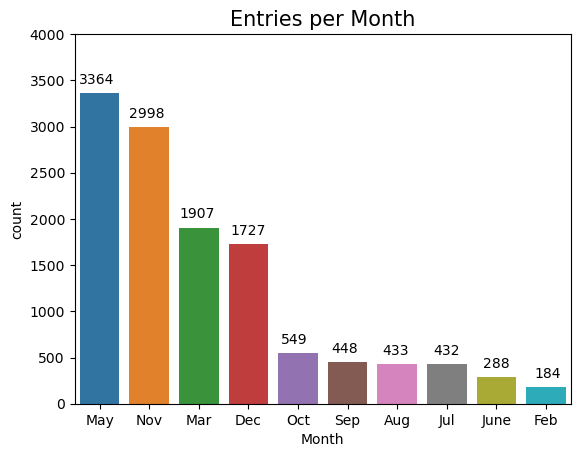

In [103]:
monthly = shopping['Month'].value_counts()

sns.countplot(data=data, x='Month', order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+100, s=str(value))
    xval += 1.02

We see that January and April are missing from the data. We also see that February and June have a low amount of sales. We can take out the month variable from our analyses since we already have the special days variable which can explain different time-varying sales choices.

In [104]:
data['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

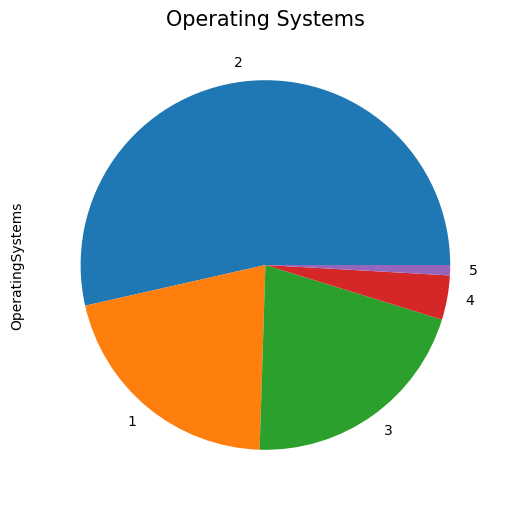

In [105]:
data['OperatingSystems'] = data['OperatingSystems'].replace([5,6,7,8],5)
os_plot = data['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

Low-usage browsers have been consolidated into label '5'. We can see that a majority of users use operating system #2 then #1. We do not think that the browser contributes to the purchase behavior of shoppers.

In [106]:
px.pie(data, names='Region', title='Percentage of Region')

Most people are from region 1, but there is variation across the other regions.

In [107]:
data['Browser']

0        1
1        2
2        1
3        2
4        3
        ..
12325    6
12326    2
12327    2
12328    2
12329    2
Name: Browser, Length: 12330, dtype: int64

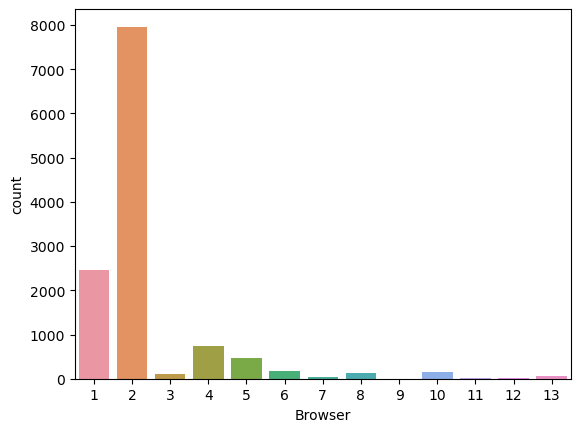

In [108]:
sns.countplot(data=data, x='Browser')
plt.show()

We see that a majority use browser type 2. Since it is not evenly distributed and all other browsers represent a small amount of users. We will leave out this variable from our model.

In [109]:
# Removing unneccessary columns from data: shopping_clean

shopping_clean = data.drop(['Month','Browser','OperatingSystems'], axis=1)

# Label & One Hot Encoding

We will need to encode our string variables to integer labels, then convert our labels from integers to One Hot columns to remove any implied hierarchy.

In [110]:
# Encoding Vistor Type

visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

We also need to make weekend into a binary variable.

In [111]:
shopping_clean_merged['Weekend'] = np.where(shopping_clean_merged['Weekend'] == True, 1, 0)

In [119]:
# Split train and test data

X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

In [120]:
model = LogisticRegression(max_iter = 600)
model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=600)

In [121]:
y_pred_lr = model.predict(x_test)

In [122]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.884022708840227


In [123]:
cr = classification_report(y_test, y_pred_lr)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

       False       0.90      0.97      0.93      2116
        True       0.67      0.35      0.46       350

    accuracy                           0.88      2466
   macro avg       0.79      0.66      0.70      2466
weighted avg       0.87      0.88      0.87      2466



In [126]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[2056   60]
 [ 226  124]]


<AxesSubplot:>

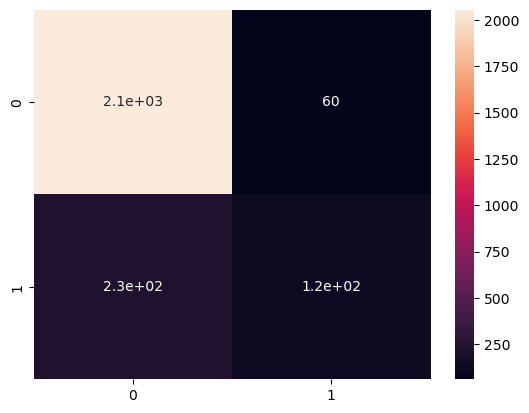

In [127]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm,annot=True)

# Gaussian Naive Bayes

Naive bayes is an efficient classification method for large datasets, and makes predictions about unknown classes using Bayes theory of probability.

In [128]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 

# Make prediction using our test data and model
y_pred = gnb.predict(x_test) 

# Comparing our prediction to response values
print("Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test, y_pred)*100,2))

Gaussian Naive Bayes model accuracy(in %): 84.59


In [125]:
cr = classification_report(y_test, y_pred_lr)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

       False       0.90      0.97      0.93      2116
        True       0.67      0.35      0.46       350

    accuracy                           0.88      2466
   macro avg       0.79      0.66      0.70      2466
weighted avg       0.87      0.88      0.87      2466



# Random Forest

In [129]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [144]:
y_pred_rf = model_rf.predict(x_test)
y_prob_rfc = model_rf.predict_proba(x_test)[:, 1]

In [132]:
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.8937550689375506


The area under the ROC curve is: 0.9


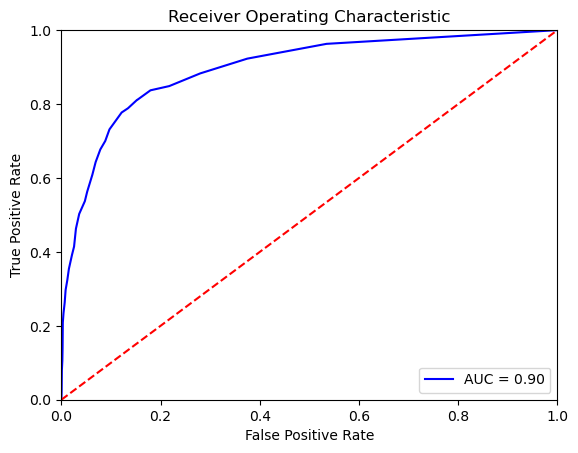

In [145]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [147]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_rf, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.12


# Feature Importance

In [151]:
# 
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 8 (0.356226)
2. Feature 7 (0.117368)
3. Feature 5 (0.103689)
4. Feature 4 (0.085411)
5. Feature 1 (0.070827)
6. Feature 6 (0.062039)
7. Feature 0 (0.044683)
8. Feature 11 (0.041003)
9. Feature 10 (0.036464)
10. Feature 3 (0.028208)
11. Feature 2 (0.018643)
12. Feature 14 (0.014221)
13. Feature 12 (0.011997)
14. Feature 9 (0.008152)
15. Feature 13 (0.001070)


<AxesSubplot:>

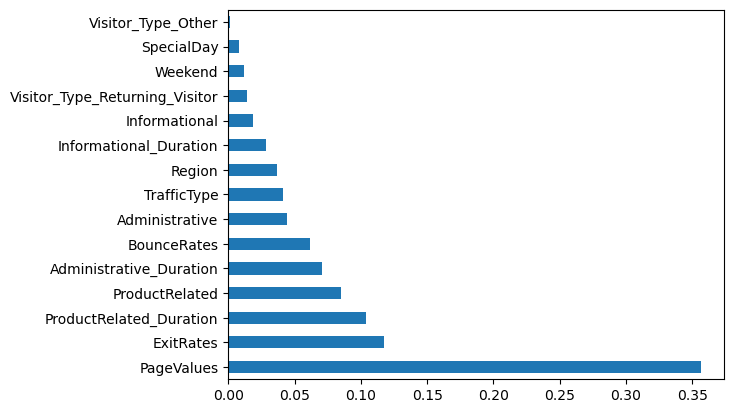

In [152]:
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

We see that page values is the most important variable in predicting whether there is revenue from the shopper session. We also want to see that product metrics are also important in predicting.

Seeing these feature importances, we want to simplify our model to only use features that may heavily contribute to our classification. Using our feature importance chart, we will take the top 5 most impactful features: PageValues, ExitRates, ProductRelated_Duration, ProductRelated, and Administrative Duration. In addition, after creating the simplififed model, we want to measure the effectiveness of our model by using cross validation.

In [185]:
# Creating simple model dataset
simple_model = shopping_clean_merged.drop(['Administrative_Duration','Administrative','Visitor_Type_Returning_Visitor','Informational_Duration','Informational','SpecialDay','Visitor_Type_Other', 'Region', 'TrafficType', 'Weekend'], axis=1)

In [194]:
# Split train and test data

x_simple = simple_model.drop('Revenue', axis=1)
y_simple = simple_model['Revenue']
x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_simple, y_simple,random_state=2, test_size=.2)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

In [195]:
clf = RandomForestClassifier(max_depth=3, random_state=2, n_estimators=50)

scores = cross_val_score(clf, x_train_simple, y_train_simple, cv=cv)
print("Average Accuracy of Classifier over 10-folds: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Average Accuracy of Classifier over 10-folds: 0.90 (+/- 0.01)


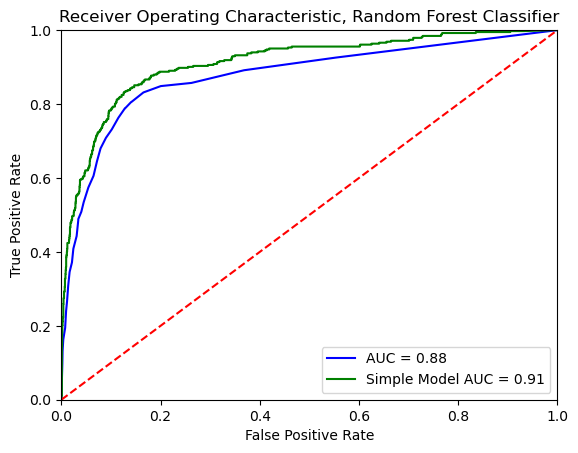

In [197]:
# Now lets compare our simplified model with our previous model:

x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_simple, y_simple,stratify=y_simple, test_size=.2, shuffle=True, random_state=1)
clf_simp = RandomForestClassifier(max_depth=5, n_estimators=1000)

clf_simp.fit(x_train_simple,y_train_simple)
y_pred_simple = clf_simp.predict(x_test_simple)
y_prob_simple = clf_simp.predict_proba(x_test_simple)[:, 1]

fpr_simp, tpr_simp, threshold_strat = metrics.roc_curve(y_test_simple, y_prob_simple)
roc_auc_simp = metrics.auc(fpr_simp, tpr_simp)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

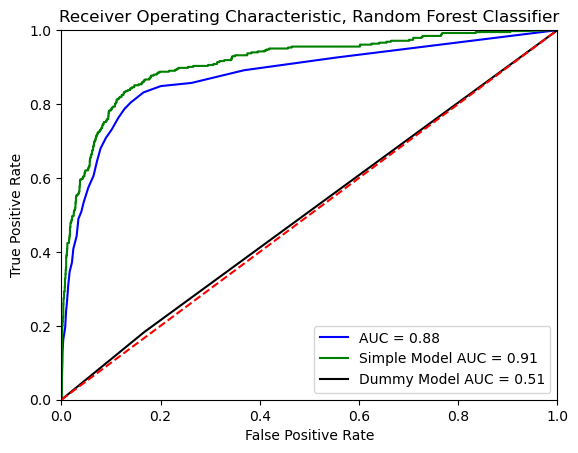

In [198]:
# Dummy Classifier

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train,y_train)

y_pred_dummy = dummy_clf.predict(x_test)
y_prob_dummy = dummy_clf.predict_proba(x_test)[:, 1]

fpr_dummy, tpr_dummy, threshold_strat = metrics.roc_curve(y_test, y_prob_dummy)
roc_auc_dummy = metrics.auc(fpr_dummy, tpr_dummy)


# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.plot(fpr_dummy, tpr_dummy, 'k', label = 'Dummy Model AUC = %0.2f' % roc_auc_dummy)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion

Our model seems to be more accurate than guessing, which is exemplified by the dummy model. By using a random forest classifier, we are able to achieve approximately 88% accuracy. The dummy classifier seems to be right about 51% of the time, which we should expect to see since it is making about 50% yes revenue generation and 50% no revenue generation. If we were to deploy this model, the most efficient model to select would be our simple model, where we included the top five most important variables as selected by feature importance. The simple model performs better than our model that includes most of the variable, and only makes the classification based on the five most important features. We suggest to use this model in predicting whether a user session will lead to revenue generation.